# Statistical Data Analysis: Machine Learning 

Load the sklearn Iris data

Iris data have been split into test and train samples
	N(train)             =  75
	N(test)              =  75
	Train split          =  0.5
	number_of_estimators =  10
	tree_depth           =  4
	min_leaf_size        =  1
Define, fit, and display a decision tree


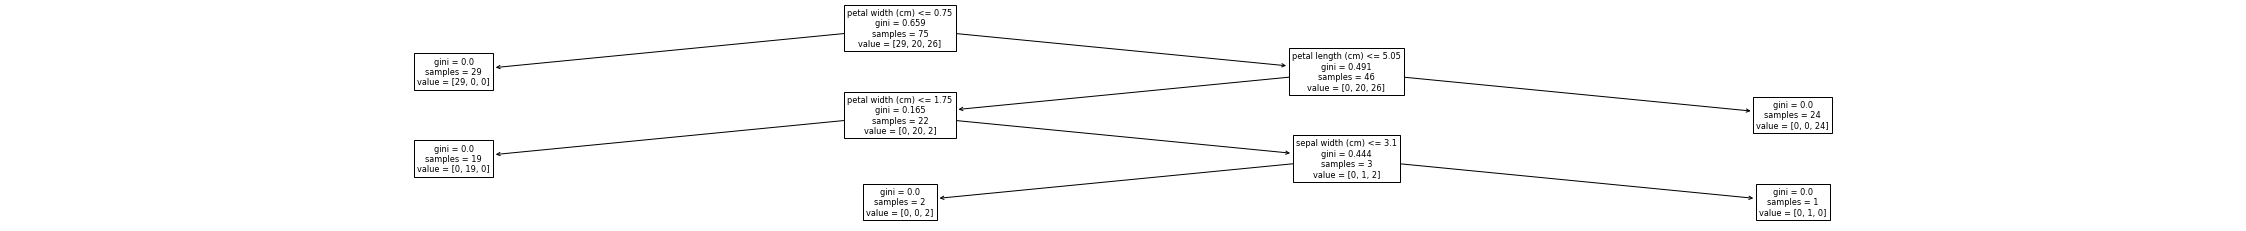

... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  1.0  (This measure of performance is biased)
	Test Score  = 0.9600
	Number of mis-classified test data = 3.0, fraction of mis-classified examples = 0.040

Test confusion matrix (train) = 
 [[29  0  0]
 [ 0 20  0]
 [ 0  0 26]]

Test confusion matrix (test) = 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
from sklearn.datasets import load_iris
#
# If having studied the iris data you wish to explore a larger data set, then the 
# NIST handwriting data (numbers 0, 1, 2, ... 9) can be loaded using load_digits. To use this one
# needs to change n_classes to 10.
#
# Uncomment the following line to import the load_digits function
#
#from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Parameters
n_classes = 3
train_split_size = 0.5     # the fraction of examples used for training
number_of_estimators = 10 # the number of boosting iterations
tree_depth    = 4          # number of divisions of data
min_leaf_size = 1          # minimum number of examples in a leaf

# Load data
print("\033[1mLoad the sklearn Iris data\033[0m\n")
iris = load_iris()
#print(iris)

# split the data into test and train samples. The train sample will be used to learn
# the model, and the test sample will be used to evaluate module performance.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, train_size=train_split_size)
print("Iris data have been split into test and train samples")
print("\tN(train)             = ", len(X_train))
print("\tN(test)              = ", len(X_test))
print("\tTrain split          = ", train_split_size)
print("\tnumber_of_estimators = ", number_of_estimators)
print("\ttree_depth           = ", tree_depth)
print("\tmin_leaf_size        = ", min_leaf_size)

#print(X_train)
#print(y_train)

print("\033[1mDefine, fit, and display a decision tree\033[0m")
DT_clf0 = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
plot_tree(DT_clf0,feature_names=iris.feature_names)
plt.show()

print("... now compute the decision tree score")
train_score = DT_clf0.score(X_train, y_train)
test_score  = DT_clf0.score(X_test, y_test)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
n_misclassified = (1-test_score)*len(X_test)
print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))

predictions_train = DT_clf0.predict(X_train)
DTcm_train = confusion_matrix(y_train, predictions_train)
print("\nTest confusion matrix (train) = \n", DTcm_train)

predictions = DT_clf0.predict(X_test)
DTcm = confusion_matrix(y_test, predictions)
print("\nTest confusion matrix (test) = \n", DTcm)

The confusion matrix is to be read as follows:
 * For each row, the total number of entries is the true number of flowers in the class for that row
  * As always: 0 ='setosa', 1 = 'versicolor', 2 = 'virginica'
 * Within each row, each column in those rows is the number of flowers classified as 0,1,2.
 * So if our MVA algorithm was perfect, we would have a diagonal confusion matrix!
 
We can also produce these with normalisation. For example, here they are normalised to the number of true flowers in each row:

In [2]:
predictions_train = DT_clf0.predict(X_train)
DTcm_train = confusion_matrix(y_train, predictions_train,normalize='true')
print("\nConfusion matrix (train sample) = \n", DTcm_train)

predictions = DT_clf0.predict(X_test)
DTcm = confusion_matrix(y_test, predictions,normalize='true')
print("\nConfusion matrix (test sample) = \n", DTcm)


Confusion matrix (train sample) = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Confusion matrix (test sample) = 
 [[1.         0.         0.        ]
 [0.         0.96666667 0.03333333]
 [0.         0.08333333 0.91666667]]


**The second confusion matrix has more missclassified samples, because it has seen more missclassified data. So if our MVA algorithm was perfect, we would have a diagonal confusion matrix!**
 
**Changed the tree depth, considering all integers 1-4. Including all 4 plot_tree outputs in the final version of this notebook. Then proceeded to make a table of the train score and test score**

| train score       | test score        |
| -----------       | -----------       |
| 0.7333333333333333| 0.6000000000000000|
| 0.9733333333333334| 0.8933333333333333|
| 0.9866666666666667| 0.9600000000000000|
| 1.0000000000000000| 0.9600000000000000|


**Iris Setosa can be easily distinguished by the algorithm, from Versicolor and Virginica by using the petal lenght and width features, and we know that it is impossible to distinguish between Versicolor and Virginica by only using a single feature of the data! In my opinion the algorithm chose the Setosa data set mostly, with a cut of 0.5 which means that all of Setosa (and some of Versicolor) are part of the data, which therefore causes some data overlap, causing a confusion matrix that is not true (perfect aka (1, 1, 1)). Also the decision tree cuts the data in order to separate them from eachother.**


**The most effective cut in the depth 3 and 4 trees is the one with the smallest value of Gini coefficient, which is 0.165 and also it cuts off the highest percentage of samples from the tree ,19/22.**

Define, fit, and display a decision tree


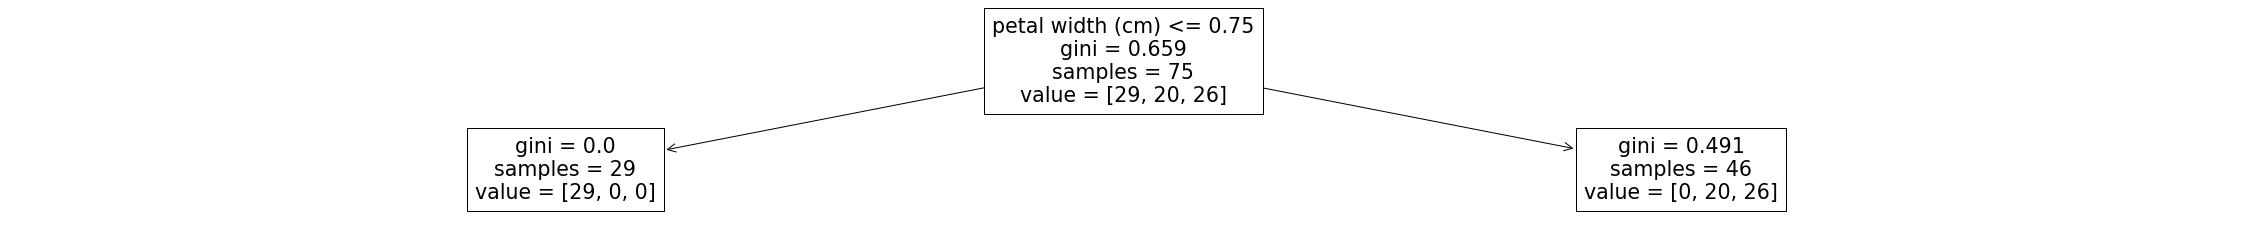

... now compute the decision tree score
0.7333333333333333
0.6


In [3]:
print("\033[1mDefine, fit, and display a decision tree\033[0m")
DT_clf0 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
plot_tree(DT_clf0,feature_names=iris.feature_names)
plt.show()

print("... now compute the decision tree score")
train_score = DT_clf0.score(X_train, y_train)
test_score  = DT_clf0.score(X_test, y_test)

print(train_score)
print(test_score)

Define, fit, and display a decision tree


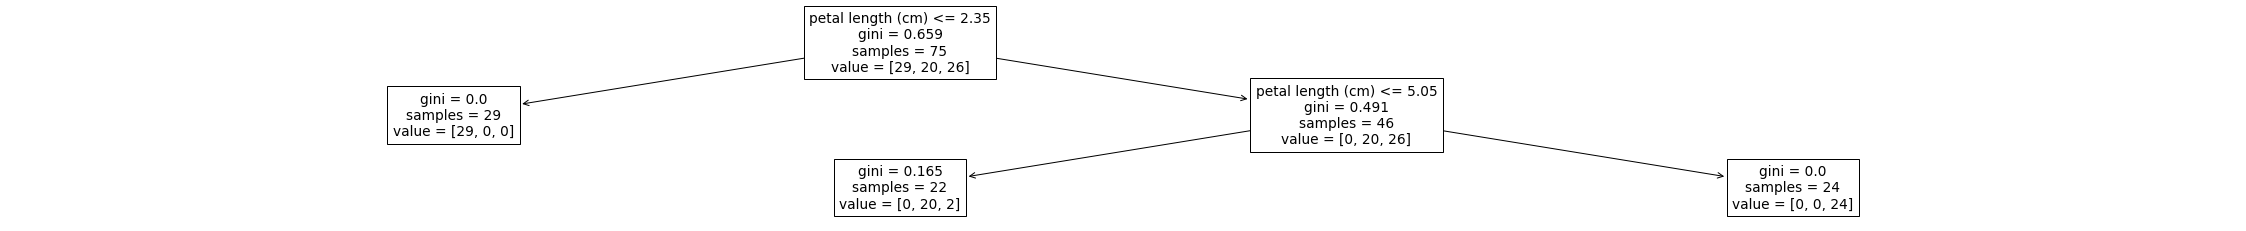

... now compute the decision tree score
0.9733333333333334
0.8933333333333333


In [4]:
print("\033[1mDefine, fit, and display a decision tree\033[0m")
DT_clf0 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
plot_tree(DT_clf0,feature_names=iris.feature_names)
plt.show()

print("... now compute the decision tree score")
train_score = DT_clf0.score(X_train, y_train)
test_score  = DT_clf0.score(X_test, y_test)
print(train_score)
print(test_score)

Define, fit, and display a decision tree


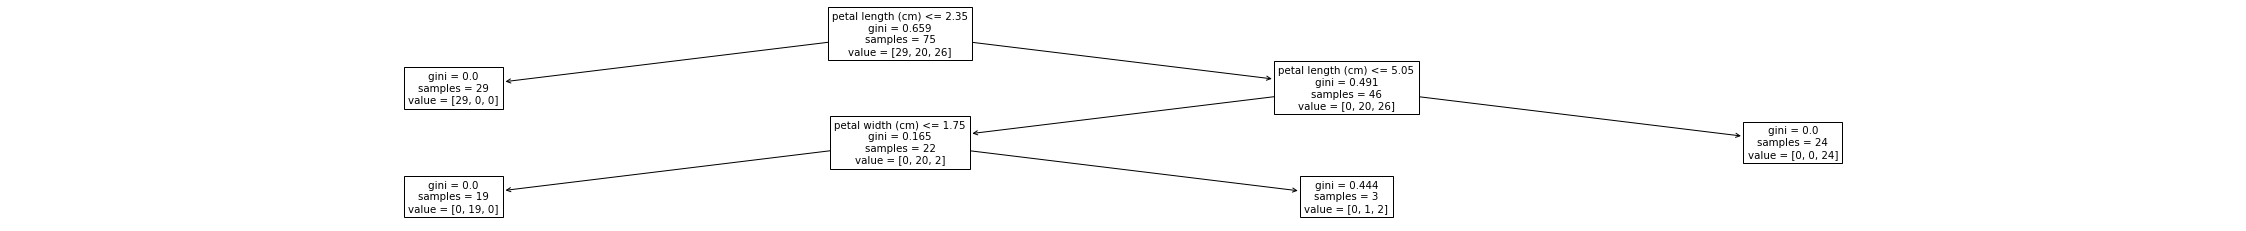

... now compute the decision tree score
0.9866666666666667
0.96


In [5]:
print("\033[1mDefine, fit, and display a decision tree\033[0m")
DT_clf0 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
plot_tree(DT_clf0,feature_names=iris.feature_names)
plt.show()

print("... now compute the decision tree score")
train_score = DT_clf0.score(X_train, y_train)
test_score  = DT_clf0.score(X_test, y_test)
print(train_score)
print(test_score)

Define, fit, and display a decision tree


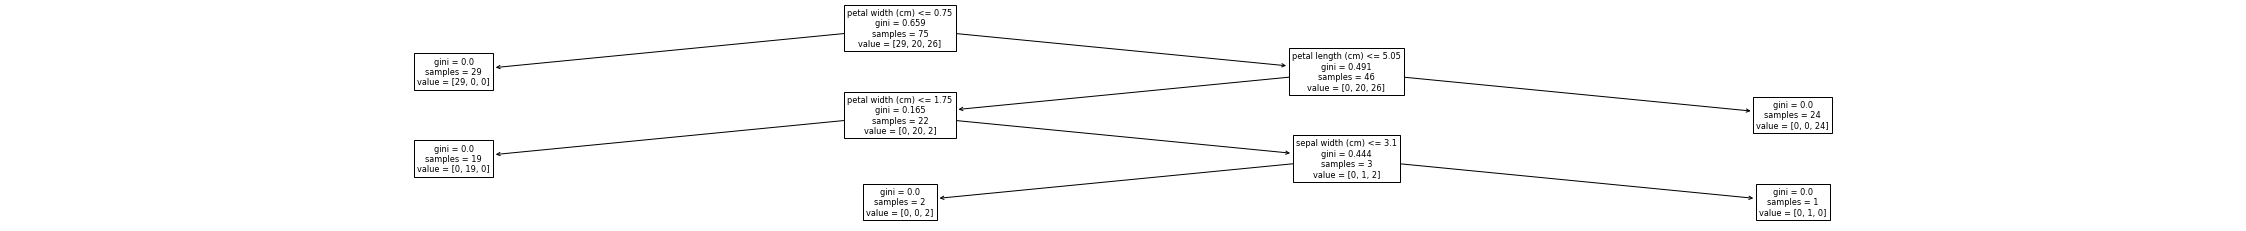

... now compute the decision tree score
1.0
0.96


In [6]:
print("\033[1mDefine, fit, and display a decision tree\033[0m")
DT_clf0 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
plot_tree(DT_clf0,feature_names=iris.feature_names)
plt.show()

print("... now compute the decision tree score")
train_score = DT_clf0.score(X_train, y_train)
test_score  = DT_clf0.score(X_test, y_test)
print(train_score)
print(test_score)

SECTION 2

Define and fit a decision tree
... now compute the boosted decision tree score

Boosted decision Tree Classifier Score is:
	Train Score =  1.0  (This measure of performance is biased)
	Test Score  = 0.9600
	Number of mis-classified test data = 3.0, fraction of mis-classified examples = 0.040

Study the test data

confusion matrix (test) = 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


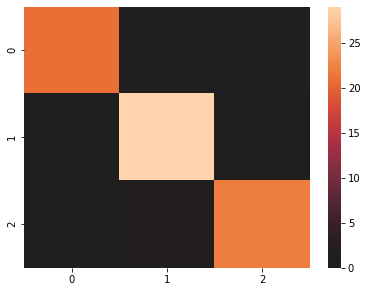

Truth	Prediction	P(type = 1)	P(type = 2)	P(type = 3)	Correct Prediction
2	2		0.0000		0.0000		1.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
2	2		0.0000		0.0001		0.9999		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0001		0.9999		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.000

In [7]:
# Code for Boosted Decision Tree

# Reset some parameters from before
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# Parameters
n_classes = 3
train_split_size = 0.5     # the fraction of examples used for training
number_of_estimators = 10 # the number of boosting iterations
tree_depth    = 2          # number of divisions of data
min_leaf_size = 1          # minimum number of examples in a leaf

print("\033[1mDefine and fit a decision tree\033[0m")
DT_clf  = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=min_leaf_size)
BDT_clf = AdaBoostClassifier(base_estimator=DT_clf, n_estimators=number_of_estimators).fit(X_train, y_train)

print("... now compute the boosted decision tree score")
train_score = BDT_clf.score(X_train, y_train)
test_score  = BDT_clf.score(X_test, y_test)

print("\nBoosted decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
n_misclassified = (1-test_score)*len(X_test)
print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))

#
# Used the test data to compute a confusion matrix and to compare predictions against
# the ground truth labels.
#
print("\n\033[1mStudy the test data\033[0m")
predictions = BDT_clf.predict(X_test)
prob_predictions = BDT_clf.predict_proba(X_test)
BDTcm = confusion_matrix(y_test, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)
sns.heatmap(BDTcm, center=True)
plt.show()

#
# Compared the ground truth and model prediction
#
print("Truth\tPrediction\tP(type = 1)\tP(type = 2)\tP(type = 3)\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == y_test[i]:
        Match = True
    print("{:}\t{:}\t\t{:5.4f}\t\t{:5.4f}\t\t{:5.4f}\t\t{:}".format(y_test[i], predictions[i], prob_predictions[i][0], prob_predictions[i][1], prob_predictions[i][2], Match))

In [8]:
all_trees = BDT_clf.estimators_
print("There are %i trees in the BDT" % len(all_trees))

There are 10 trees in the BDT


[Text(892.8, 135.9, 'petal width (cm) <= 0.75\ngini = 0.659\nsamples = 75\nvalue = [0.387, 0.267, 0.347]'),
 Text(446.4, 81.54, 'gini = 0.0\nsamples = 29\nvalue = [0.387, 0.0, 0.0]'),
 Text(1339.1999999999998, 81.54, 'petal length (cm) <= 5.05\ngini = 0.491\nsamples = 46\nvalue = [0.0, 0.267, 0.347]'),
 Text(892.8, 27.180000000000007, 'gini = 0.165\nsamples = 22\nvalue = [0.0, 0.267, 0.027]'),
 Text(1785.6, 27.180000000000007, 'gini = -0.0\nsamples = 24\nvalue = [0.0, 0.0, 0.32]')]

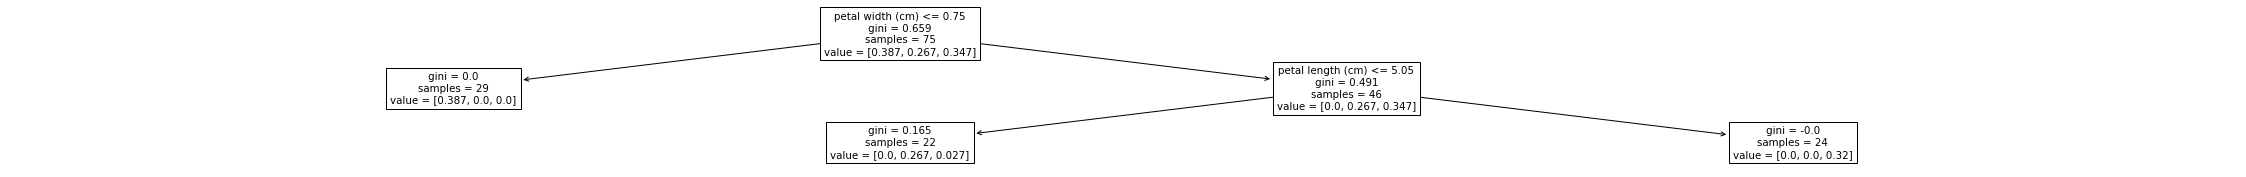

In [9]:
plt.rcParams["figure.figsize"] = (40,3)
plot_tree(all_trees[0],feature_names=iris.feature_names)

[Text(892.8, 135.9, 'petal width (cm) <= 0.75\ngini = 0.667\nsamples = 75\nvalue = [0.333, 0.333, 0.333]'),
 Text(446.4, 81.54, 'gini = 0.0\nsamples = 29\nvalue = [0.333, 0.0, 0.0]'),
 Text(1339.1999999999998, 81.54, 'sepal length (cm) <= 5.95\ngini = 0.5\nsamples = 46\nvalue = [0.0, 0.333, 0.333]'),
 Text(892.8, 27.180000000000007, 'gini = 0.0\nsamples = 15\nvalue = [0.0, 0.263, 0.0]'),
 Text(1785.6, 27.180000000000007, 'gini = 0.289\nsamples = 31\nvalue = [0.0, 0.071, 0.333]')]

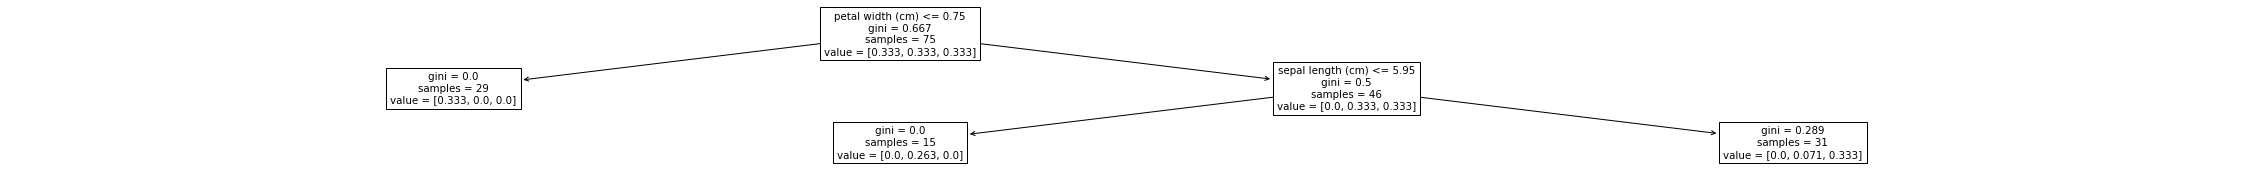

In [10]:
plot_tree(all_trees[9],feature_names=iris.feature_names
)

These questions refer to the BDT cells above.

**5.: Compare the 0th tree to the Decision Tree in the first part of this assignment (for the same tree depth). What are the similarities and what are the differences? Bearing in mind that the Boosted tree normalises the sample to 1 at each step, are the trees roughly equally effective? Which of the differences can you account for, and which not?** [5 marks]
The Gini coefficients are the same for both trees, and also the amount of splits are the same. The difference is that the tree in the beginning does not normalise the data between 0 and 1 but keeps it as whole numbers. Because the cuts are identical for both the DT and BDT, the trees are roughly equally effective. Also the sample split is the same for both, same as the cut. A good note is that on the 9th tree the tables differ ever so slightly. Also a normalisation helps us to interpret the data better.
**6. Using a train split of 0.5. Explore the effect of (a) changing the number of estimators, and (b) changing the tree depth, on the performance of the classifier. For this exercise tabulate results for including 10, 100, 500 and 1000 estimators (i.e. boosting iterations) and for tree depths of 1, 2, 3.  The result you give for each configuration should be the fraction of mis-classified test examples.** [5 marks]

| Split 0.5        | Depth 1     | Depth 2     | Depth 3    |
| -------------    | ----------- | ----------- |----------- |
| 10 estimators    |   0.080     |   0.040     |   0.040    |
| 100 estimators   |   0.080     |   0.040     |   0.040    |
| 500 estimators   |   0.080     |   0.040     |   0.040    |
| 1000 estimators  |   0.080     |   0.040     |   0.040    |


**7. Repeat the above using a train split of 0.8.** [2 marks]

| Split 0.8        | Depth 1     | Depth 2     | Depth 3    |
| -------------    | ----------- | ----------- |----------- |
| 10 estimators    |   0.080     |   0.040     |   0.040    |
| 100 estimators   |   0.080     |   0.040     |   0.040    |
| 500 estimators   |   0.080     |   0.040     |   0.040    |
| 1000 estimators  |   0.080     |   0.040     |   0.040    |

**8. What is the configuration that leads to the least fraction of mis-classified examples?** [1 mark]
The configuration that leads to the least amount of miss-classified data is a split of 0.5/0.8 with a depth 2/3, as it gives us the smallest fraction.

**9. Why do you think, in detail, that any residual example(s) are mis-classified by the algorithm? If there are no mis-classified samples, is this what you expect? Comment in particular on the available testing sample size.** [2 marks]
If nothing is missclassified this means that the data is in perfect correlation inside the given cut. For example using the train split of 0.8 wouldnt give us a true confusion matrix, but a train split exactly inside, for example Iris Setosa would give us a no missclassified samples. Which means that if we overtrain the data, and in particular of this sample size, it would give us miss-classified samples as Iris Setosa is quite far away from the Virginica and Versicolor samples.

**NOTE: After doing the split 0.8 depth 2, I got a statistical anomaly of 0.053, not 0.040. If we go more in depth, we can use a Z-value to determine the anomalies.**

Define and fit a decision tree
... now compute the boosted decision tree score

Boosted decision Tree Classifier Score is:
	Train Score =  1.0  (This measure of performance is biased)
	Test Score  = 0.9600
	Number of mis-classified test data = 3.0, fraction of mis-classified examples = 0.040

Study the test data

confusion matrix (test) = 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


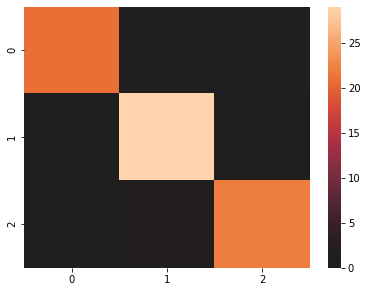

In [11]:
# Code for Boosted Decision Tree

# Reset some parameters from before
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# Parameters
n_classes = 3
train_split_size = 0.8     # the fraction of examples used for training
number_of_estimators = 100 # the number of boosting iterations
tree_depth    = 3          # number of divisions of data
min_leaf_size = 1          # minimum number of examples in a leaf

print("\033[1mDefine and fit a decision tree\033[0m")
DT_clf  = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=min_leaf_size)
BDT_clf = AdaBoostClassifier(base_estimator=DT_clf, n_estimators=number_of_estimators).fit(X_train, y_train)

print("... now compute the boosted decision tree score")
train_score = BDT_clf.score(X_train, y_train)
test_score  = BDT_clf.score(X_test, y_test)

print("\nBoosted decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
n_misclassified = (1-test_score)*len(X_test)
print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))

#
# Use the test data to compute a confusion matrix and to compare predictions against
# the ground truth labels.
#
print("\n\033[1mStudy the test data\033[0m")
predictions = BDT_clf.predict(X_test)
prob_predictions = BDT_clf.predict_proba(X_test)
BDTcm = confusion_matrix(y_test, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)
sns.heatmap(BDTcm, center=True)
plt.show()